## K-means Algorithm

1. Initialize $\{\mu_k\}_{k=1}^K$, $\mu_k$ is the k-th centroid.

2. repeat:

    Step 1: Assign $\{x_i\}_{i=1}^n$ to its nearest cluster centroid
    
    Step 2: For each $k\in\{1,\cdots,K\}$, compute the centroid of $C_i$: $\mu_i=\frac{1}{n_k}\sum_{i=1}^{n_k}x_{ki}$
    
 until converge

## Derivation

Given $n$ data samples in $\mathcal{X}\subset\mathbb{R}^d$ and an integer $K$, our algorithm tries to determine $K$ classes with centers $\mathcal{U}_k=\{\mu_k\}_{k=1}^K\subset\mathbb{R}^d$ and a mapping function $f:\mathcal{X}\rightarrow\{1,\cdots,K\}$.

Objective:
\begin{align*}
\phi&=\sum_{k=1}^K\frac{1}{n_k}\sum_{i=1}^{n_k}\sum_{j=1}^{n_k}\|x_{ki}-x_{kj}\|^2\\
    &=\sum_{k=1}^K\frac{1}{n_k}\sum_{i=1}^{n_k}(\sum_{j=1}^{n_k}\|x_{ki}-\mu_k+\mu_k-x_{kj}\|^2)\\
    &=\sum_{k=1}^K\frac{1}{n_k}\sum_{i=1}^{n_k}\sum_{j=1}^{n_k}(\|x_{ki}-\mu_k\|^2+\|\mu_k-x_{kj}\|^2)\\
     &=\sum_{k=1}^K\frac{1}{n_k}\sum_{i=1}^{n_k}(n_k\|x_{ki}-\mu_k\|^2+\sum_{j=1}^{n_k}\|\mu_k-x_{kj}\|^2)\\
     &=\sum_{k=1}^K(\sum_{i=1}^{n_k}\|x_{ki}-\mu_k\|^2+\sum_{j=1}^{n_k}\|\mu_k-x_{kj}\|^2)\\
     &=2\sum_{k=1}^K\sum_{i=1}^{n_k}\|x_{ki}-\mu_k\|^2
\end{align*}

\begin{lemma}\label{lem:Lemma1}
Given a set of points $\mathcal{X}\subset\mathbb{R}^d$ with center $\bar{x}$. For $\forall s$

$$\sum_{x\in\mathcal{X}}\|x-s\|^2-\sum_{x\in\mathcal{X}}\|x-\bar{x}\|^2=\left|\mathcal{X}\right|\cdot\|\bar{x}-s\|^2$$
\end{lemma}

\begin{proof}

\begin{align*}
\sum_{x\in\mathcal{X}}\|x-s\|^2-\sum_{x\in\mathcal{X}}\|x-\bar{x}\|^2&=(x-s)^T(x-s)-(x-\bar{x})^T(x-\bar{x})\\
&=x^Tx-x^Ts-s^Tx+s^Ts-x^Tx+x^T\bar{x}+\bar{x}^Tx-\bar{x}^T\bar{x}\\
&=s^Ts+2x^T(\bar{x}-s)-\bar{x}^T\bar{x}\\
&=(2x-\bar{x}+s)^T(\bar{x}-s)\\
&=\left|\mathcal{X}\right|(2\bar{x}-\bar{x}+s)^T(\bar{x}-s)\\
&=\left|\mathcal{X}\right|\cdot\|\bar{x}-s\|^2
\end{align*}


\end{proof}

### Why K-means decrease the objective?

Step 1: We fix the centroid, assign points to the nearest centroids, it can minimize objective in current situation

Step 2: We re-estimate the class centroids, according to \ref{lem:Lemma1}, we know $s\not=\bar{x}$ will cause larger objective value than current computing centroids. 

### Why larger K cause lower loss?

Let $\Omega(K)=\min_{\mathcal{U}_K,f}\phi(\mathcal{U}_K,f;\mathcal{X})$

If $K\geq n$, the center will be points themselves, the objective is zero.

If $K<n$, choose $x$ that is not a centroid, let $x$ be another center, it's trivial that if $x$ is far from all points, objective will not change, if $x$ is nearby some points, it can cause the smaller distances than previous.

$$\Omega(K)\geq\phi(\mathcal{U}_{K+1},f^\prime;\mathcal{X})\geq\Omega(K+1)$$

### Why K-means halts?

We know $\phi^{i+1}<\phi^i$ and $\phi\geq 0$, according to **Bounded monotonic sequence has limit** we know $\phi^i$ has a limit.
And total steps is bounded by $n^K$, so we can find the minimum within finite steps.

## K-means++ initialization

1. Take one center $\mu_1$, chosen uniformly at random from $\mathcal{X}$.

2. Take a new center $\mu_k(k>1)$ from $\mathcal{X}$, so that $\mathbb{P}(\mu_k=x_i)=\frac{D(x_i)^2}{\sum_{j=1}^nD_(x_j)^2}$, where $D(x)$ is the distance from $x$ to its nearest center in $\{\mu_k\}_{k=1}^{j-1}$.

3. Repeat until all $\{\mu_k\}_{k=1}^{T}$ have been initialized.

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
class K_means:
    def __init__(self,X):
        self.X = X
    def clustering(self,K,max_iter = 100):
        self.K = K
        self.centroid = np.zeros((self.K,self.X.shape[-1]))
        for i in range(self.K):
            self.centroid[i] = np.random.uniform(X.min(axis=0),X.max(axis=0))
        label = np.zeros(self.X.shape[0])
        flag = np.ones(self.X.shape[0])
        i = 0
        obj = []
        while (i<max_iter): #((label - flag).any() != 0) and (i<max_iter)
            i = i + 1
            flag = label.copy()
            for obs in range(self.X.shape[0]):
                distance = np.sqrt(np.sum((self.centroid-X[obs])**2,axis=1))
                label[obs] = np.argmin(distance)
            error = 0.0 
            for center in range(self.K):
                error = error + (np.sum((self.X[label == center] - self.centroid[center])**2))
                self.centroid[center] = self.X[label == center].mean(axis=0)
            obj.append(error)
        return label,self.centroid,obj

In [3]:
X = datasets.load_iris().data
cls = K_means(X)
label, centroid, objective = cls.clustering(3,20)

In [4]:
label

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  2.,
        0.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  0.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  0.,  2.,  0.,  0.,
        0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  2.,  0.,  0.,
        0.,  0.,  2.,  0.,  2.,  0.,  2.,  0.,  0.,  2.,  2.,  0.,  0.,
        0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  2.,
        0.,  0.,  0.,  2.,  0.,  0.,  2.])

In [5]:
centroid

array([[ 6.85384615,  3.07692308,  5.71538462,  2.05384615],
       [ 5.006     ,  3.418     ,  1.464     ,  0.244     ],
       [ 5.88360656,  2.74098361,  4.38852459,  1.43442623]])

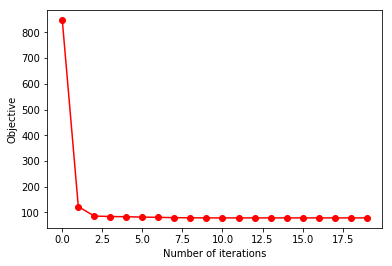

In [6]:
plt.plot(objective,'ro-')
plt.xlabel("Number of iterations")
plt.ylabel("Objective")

In [7]:
class K_means_plus_plus:
    def __init__(self,X):
        self.X = X
    def clustering(self,K,max_iter = 100):
        self.K = K
        cent = []
        # initialize center 1 by randomly choose with uniform prob
        cent.append(X[np.random.randint(len(X))])
        if self.K > 1:
            # assign next choose prob according to the distance from current center
            prob = (np.sum((X-cent[0])**2,axis = 1)/(np.sum((X-cent[0])**2)))
            # randomly choose the 2nd center
            cent.append(X[np.random.choice(len(X),1,p=prob)])
            near = np.zeros(self.X.shape[0])
            # from 3rd center
            for c in range(2,self.K):
                p = np.zeros(self.X.shape[0])
                sum_distance = 0.0
                for i in range(self.X.shape[0]):
                    near[i] = np.argmin(np.sum((np.vstack(cent) - self.X[i])**2,axis = 1))
                for i in range(c):
                    sum_distance = sum_distance + np.sum((self.X[np.where(near == i)] - np.vstack(cent)[i])**2)
                for i in range(self.X.shape[0]):
                    p[i] = np.sum((self.X[i]- np.vstack(cent)[near[i]])**2)/sum_distance
                cent.append(self.X[np.random.choice(len(self.X),1,p=p)])
            self.centroid = np.vstack(cent)
        else:
            self.centroid = np.array(cent) 
        label = np.zeros(self.X.shape[0])
        flag = np.ones(self.X.shape[0])
        i = 0
        obj = []
        while (i<max_iter): #((label - flag).any() != 0) and (i<max_iter)
            i = i + 1
            flag = label.copy()
            for obs in range(self.X.shape[0]):
                distance = np.sqrt(np.sum((self.centroid-X[obs])**2,axis=1))
                label[obs] = np.argmin(distance)
            error = 0.0 
            for center in range(self.K):
                error = error + (np.sum((self.X[label == center] - self.centroid[center])**2))
                self.centroid[center] = self.X[label == center].mean(axis=0)
            obj.append(error)
        return label,self.centroid,obj

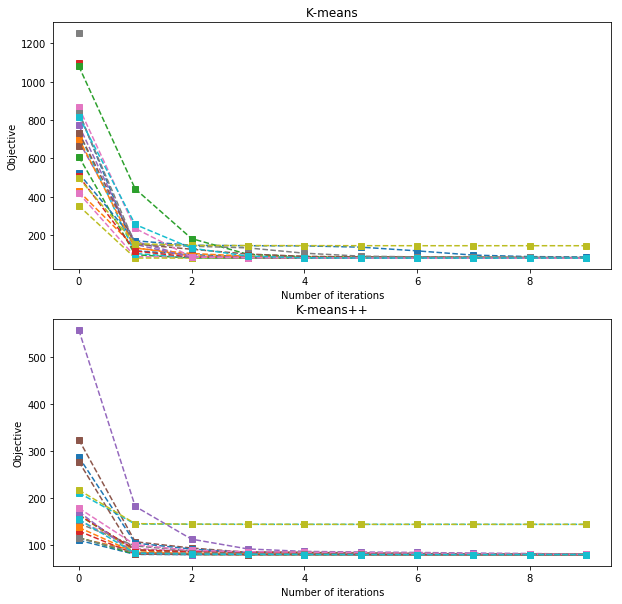

In [8]:
cls = K_means(X)
cls_1 = K_means_plus_plus(X)
fig = plt.figure(figsize = (10,10))
ax_1 = fig.add_subplot(211)
ax_2 = fig.add_subplot(212)
for i in range(20):
    label,centroid,obj = cls.clustering(3,10)
    ax_1.plot(obj,'s--')
    label,centroid,obj = cls_1.clustering(3,10)
    ax_2.plot(obj,'s--')
ax_1.set_xlabel("Number of iterations")
ax_1.set_ylabel("Objective")
ax_2.set_xlabel("Number of iterations")
ax_2.set_ylabel("Objective")
ax_1.set_title("K-means")
ax_2.set_title("K-means++")